# COGS 108 - Final Project 

# Overview

In this project, I intended to identify whether there is a relationship between a parks' proximity to the ocean and their Yelp rating. Secondly, I wanted to discover what parts of San Diego are in need of new or updated pickleball courts. It appeared that there was no significant relationship between distance to ocean and rating. The most suitable locations for future picklball courts are located in North City and Central region. 

# Name & GitHub

- Name: Cory Smith
- GitHub Username: corysmithm

# Research Question

Is there a relationship between reviewed parks' proximity to the ocean and rating? 

What parts of San Diego are most in need of new or updated outdoor pickleball courts? 


## Background and Prior Work

Pickeball is a very hot new outdoor sport that involves a wiffle ball and stiff paddles. It is often played on its own small court, but a tennis court can be reconstructed to fit a pickleball court's dimensions. The dimensions for a pickleball court are 20'x 44' for both singles and doubles play. 

While searching for outdoor places to play pickleball, only a handful of options popped up. There are only about 13 pickleball courts that show up on Yelp in San Diego (1). Contrast this with more than 159 tennis courts, with 140 of them being lighted (2). Going by number of courts, tennis seems to be the dominant outside sport played on court. However, pickleball is quickly growing in popularity and may soon overtake tennis.

Pickleball is a sport for all ages, but has been most popular among older folks upwards of 40 years old. It requires less agility than tennis and has a fast learning curve. Playing pickleball only 3 times a week can have significant health benefits in the long term. As you get older, you can't play the same sports you always grew up playing. Since pickleball is a very social, competitive, and easy to learn game, the pickleball landscape has been expanding rapidly.

With pickleball's rise to fame, there has been a lot of new findings and research. One study tries to assess what the reason is for Older Adults liking and appreciation for Pickleball. The paper is titled, "Psychological Connection to Pickleball: Assessing Motives and Participation in Older Adults." The paper highlights that there is strong correlation between motives for skill mastery and competition were strong indications of the highest connection levels (3).

References (include links):

1) https://www.google.com/search?q=pickleball+courts+in+san+diego&npsic=0&rflfq=1&rldoc=1&rlha=0&rllag=32777707,-117227172,2778&tbm=lcl&sa=X&ved=2ahUKEwj9q6z1oszsAhWQtp4KHVnFD_gQjGp6BAgKEFI&biw=1440&bih=789#rlfi=hd:;si:;mv:[[33.069137,-117.00077489999998],[32.6618122,-117.2593613]]

2) https://www.sandiegomagazine.com/outdoors/sports/the-best-tennis-courts-and-clubs-in-san-diego/article_2cafb064-af68-502d-904a-119a2d0ee6ec.html#:~:text=In%20the%20City%20of%20San,with%20lights%20for%20nighttime%20play. 

3) https://pubmed.ncbi.nlm.nih.gov/29543109/

# Hypothesis

I believe that there will be a strong relationship between parks located closer to the ocean since I think these parks would have better weather and more money devoted to keeping the parks new and functioning.I believe that San Diego parks located relatively close (within 10 miles) to the coast are the most in need of new and updated courts due to the fact that there are more active people near the beach and because these parks are used at a much higher rate than downtown or inland.

# Datasets


Dataset 1:
- Dataset Name: df_sdBoundary
- Link to the dataset: https://sdgis-sandag.opendata.arcgis.com/datasets/major-statistical-areas-msas/data?geometry=-121.213%2C32.000%2C-113.302%2C33.616
- Number of observations: 7
    
This dataset provides a visual of San Diego County by Regions. This data helped make it easier to visualize where each park in San Diego was located in relation to San Diego.

Dataset 2:
- Dataset Name: df_parks
- Link to the dataset:  https://www.yelp.com/search?find_desc=Parks%20and%20Recreation&find_loc=San%20Diego%2C%20CA 
- Number of observations: 703
    
This dataset provides data on the reviewed parks in San Diego from Yelp using Fusion API. I used coordinates provided to plot the points in pink on the main visual.


Dataset 3:
- Dataset Name: df_pickleball
- Link to the dataset: https://www.yelp.com/search?find_desc=pickleball&find_loc=San+Diego%2C+CA
- Number of observations: 13

This dataset provides data on the review pickleball courts in San Diego from Yelp Fusion API. I used coordinates to plot the points in blue on the main visual.

Dataset 4:
- Dataset Name: df_coast
- Link to the dataset: self-created
- Number of observations: 20

This dataset was self-created to roughly represent the coast of California. Since the coast is not too complex to point, 20 data points will represent the coast fine. I added more coastal points where there was a higher density of parks.

# Setup

In [1]:
#import libraries needed for project
%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np
import json

import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['figure.figsize'] = (17, 7)
plt.rcParams.update({'font.size': 17})
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns

import patsy
import statsmodels.api as sm

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skewnorm
from shapely.geometry import shape

## Loading the Data

In [2]:
#importing data provided, using geopandas for geojson files and pandas for csv files
df_sdBoundary = gpd.read_file('/Users/corysmith/Documents/GitHub/individual_fa20/data/MSA_SRA.geojson')
df_parks = pd.read_csv('/Users/corysmith/Documents/GitHub/individual_fa20/data/yelp_SD_parks.csv')

Below, I have commented out used code for Yelp Fusion API. My inputs were "pickleball" and "San Diego, CA"

In [3]:
"""
headers = {'Authorization': 'Bearer %s' % api_key}
url='https://api.yelp.com/v3/businesses/search'
params = {'term':'pickleball','location':'San Diego, CA'}
req=requests.get(url, params=params, headers=headers)
print('The status code is {}'.format(req.status_code))
y = json.loads(req.text)
with open("pickleBall_SD.json","w") as write_file:
    json.dump(y,write_file)
""";

In [4]:
# import pickleball data
data = json.load(open('/Users/corysmith/Desktop/pickleBall_SD.json'))
df_pickleball = pd.DataFrame(data["businesses"])

In [5]:
# self-create dataframe with points  that will roughly represent the coast of California.

#20 data points will represent coast fine. More coastal points where there is higher density of rated parks
coastData = {'Ocean_X':  [-117.125, -117.13,-117.145,-117.185,-117.245,-117.255,-117.255, -117.255, -117.26, -117.282,
                          -117.255,-117.26,-117.274,-117.283,-117.31, -117.33,-117.362,-117.42,-117.485,-117.55],
             'Ocean_Y': [32.55, 32.6,32.64,32.68,32.67,32.7,32.74,32.76, 32.8,32.85,32.875,32.92,32.975,33.025,33.075,
                        33.125,33.17,33.24,33.315,33.37]}

df_coast = pd.DataFrame (coastData, columns = ['Ocean_X','Ocean_Y'])
df_coast['coordinates'] = [tuple(r) for r in df_coast.to_numpy()]

# Data Cleaning

### Briefly inspect each dataset

In [6]:
df_sdBoundary.head(7)

,Name,description,OBJECTID,MSA,ShapeSTArea,ShapeSTLength,geometry
0,CENTRAL,None,1,0,2.728022e+09,3.294290e+05,"POLYGON ((-117.25286 32.75420, -117.25300 32.7..."
1,NORTH CITY,None,2,1,8.049704e+09,4.756468e+05,"POLYGON ((-117.04577 33.05124, -117.04604 33.0..."
2,SOUTH SUBURBAN,None,3,2,2.926518e+09,3.169035e+05,"POLYGON ((-117.01062 32.70222, -117.01068 32.7..."
3,EAST SUBURBAN,None,4,3,1.616681e+10,8.256613e+05,"POLYGON ((-116.81360 33.12265, -116.81371 33.1..."
4,NORTH COUNTY WEST,None,5,4,9.676043e+09,6.704777e+05,"POLYGON ((-117.50939 33.48403, -117.50948 33.4..."
5,NORTH COUNTY EAST,None,6,5,1.478711e+10,8.121498e+05,"POLYGON ((-117.50939 33.48403, -117.50939 33.4..."
6,EAST COUNTY,None,7,6,6.445522e+10,1.412873e+06,"POLYGON ((-117.05235 33.43008, -117.05228 33.4..."


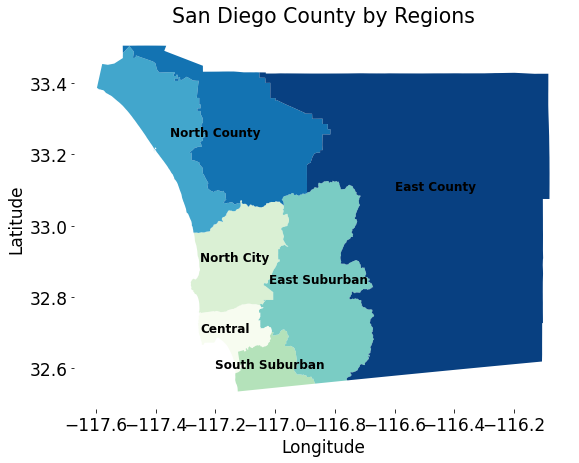

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(17,7))
divider = make_axes_locatable(ax)
df_sdBoundary.plot(cmap='GnBu',ax=ax, legend=True)
style = dict(size=12,horizontalalignment='left',color='black', weight='semibold')
ax.text(-116.6,33.1, "East County", **style)
ax.text(-117.35,33.25, "North County", **style)
ax.text(-117.25,32.9, "North City", **style)
ax.text(-117.25,32.7, "Central", **style)
ax.text(-117.02,32.84, "East Suburban", **style)
ax.text(-117.2,32.6, "South Suburban", **style);
ax.set(title='San Diego County by Regions',xlabel='Longitude', ylabel='Latitude', frame_on=False);

The dataframe df_sdBoundary did not need cleaning since the regions were all correct and had no problems plotting. I added the region names to help make visual more interpretable.

In [8]:
df_parks.head()

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False


In [9]:
df_pickleball.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price
0,HWZcTAiWjgfb8bBvbnyMOQ,san-diego-pickleball-san-diego-2,San Diego Pickleball,https://s3-media2.fl.yelpcdn.com/bphoto/5_3hIk...,False,https://www.yelp.com/biz/san-diego-pickleball-...,13,"[{'alias': 'pickleball', 'title': 'Pickleball'}]",5.0,"{'latitude': 32.80116, 'longitude': -117.220376}",[],"{'address1': '2639 Grand Ave', 'address2': '',...",+18586308740,(858) 630-8740,6307.357754,NaN
1,2zdcap5iFnkY-i4U5B7upg,balboa-park-activity-center-san-diego,Balboa Park Activity Center,https://s3-media4.fl.yelpcdn.com/bphoto/yxrLvL...,False,https://www.yelp.com/biz/balboa-park-activity-...,17,"[{'alias': 'recreation', 'title': 'Recreation ...",4.5,"{'latitude': 32.7267754570807, 'longitude': -1...",[],"{'address1': '2145 Park Blvd', 'address2': '',...",+18585817100,(858) 581-7100,7118.317980,NaN
2,xqSlTvVNDabiILKsCu9A6Q,san-diego-tennis-and-racquet-club-san-diego,San Diego Tennis & Racquet Club,https://s3-media2.fl.yelpcdn.com/bphoto/CJKaMZ...,False,https://www.yelp.com/biz/san-diego-tennis-and-...,16,"[{'alias': 'tennis', 'title': 'Tennis'}]",4.5,"{'latitude': 32.7763366699219, 'longitude': -1...",[],"{'address1': '4848 Tecolote Rd', 'address2': '...",+16192753270,(619) 275-3270,4532.734931,NaN
3,7U_rG3NbsjHmp2yJAUwYRw,pacific-beach-tennis-club-san-diego,Pacific Beach Tennis Club,https://s3-media1.fl.yelpcdn.com/bphoto/8AE8w6...,False,https://www.yelp.com/biz/pacific-beach-tennis-...,8,"[{'alias': 'tennis', 'title': 'Tennis'}]",5.0,"{'latitude': 32.801932990551, 'longitude': -11...",[],"{'address1': '2639 Grand Ave', 'address2': '',...",+18582739177,(858) 273-9177,6384.507594,NaN
4,L5HlaNybye6syJmTpGbzgA,carmel-valley-tennis-san-diego,Carmel Valley Tennis,https://s3-media2.fl.yelpcdn.com/bphoto/ha8Tsn...,False,https://www.yelp.com/biz/carmel-valley-tennis-...,20,"[{'alias': 'tennis', 'title': 'Tennis'}]",4.0,"{'latitude': 32.949397, 'longitude': -117.232597}",[],"{'address1': '3777 Townsgate Dr', 'address2': ...",+18585044181,(858) 504-4181,19122.537824,NaN


## Cutting Down Data

In [10]:
# drop some columns that will not be used in analysis
df_parks = df_parks.drop(columns=['address','phone','url','is_closed'])

In [11]:
#set column names similar to order from df_parks, deleting columns not needed for analysis
df_pickleball = df_pickleball[['name','id', 'rating', 'review_count','coordinates']]

In [12]:
# create latitude and longitude columns by splitting up coordinates column
df_pickleball['coordinates'] = df_pickleball['coordinates'].astype(str)
df_pickleball['longitude'] = df_pickleball['coordinates'].str.split(':').str[2]
df_pickleball['latitude'] = df_pickleball['coordinates'].str.split(':').str[1]

#make both columns string type for splitting
df_pickleball['longitude'] = df_pickleball['longitude'].astype(str)
df_pickleball['latitude'] = df_pickleball['latitude'].astype(str)

df_pickleball['longitude'] = df_pickleball['longitude'].str.split('}').str[0]
df_pickleball['latitude'] = df_pickleball['latitude'].str.split(',').str[0]

#drop original coordinates column
df_pickleball = df_pickleball.drop(columns =['coordinates'])

#now finalize both latitude and longitude columns as float type
df_pickleball['longitude'] = df_pickleball['longitude'].astype(float)
df_pickleball['latitude'] = df_pickleball['latitude'].astype(float)

Now that we have previewed our data sets, we can now layer our visual data to see a more complete picture of the data we are working with.

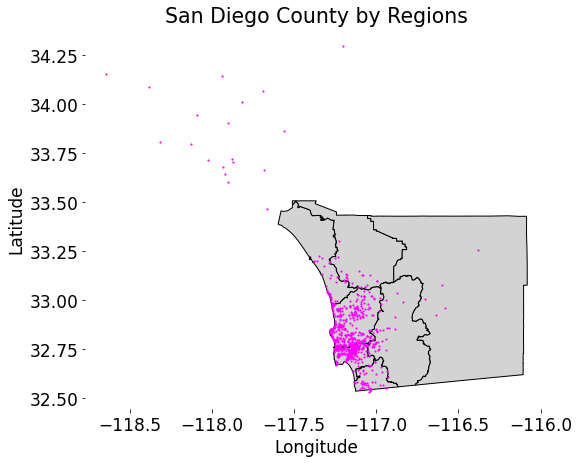

In [13]:
base = df_sdBoundary.plot(color='lightgrey',edgecolor='black')
base.plot( df_parks['longitude'],df_parks['latitude'], 'o', color = "magenta", ms=1.1)
base.set(title='San Diego County by Regions',xlabel='Longitude', ylabel='Latitude', frame_on=False);

The pink markers represent all of the yelp reviewed parks in San Diego County.

It appears that the yelp dataset included some parks that don't lie within San Diego County. Also, the far point on the right represents Anzo-Borrego Desert State Park, which is an outlier in our dataset. I will remove the data points that will not be helpful for our analysis.

In [14]:
# update dataset to only include parks that lie within San Diego county
df_parks = df_parks[df_parks['longitude'] > -117.60]
df_parks = df_parks[df_parks['latitude'] < 33.50]
df_parks = df_parks[df_parks['longitude'] < -116.5]

I will now look at the updated plot while also including pickleball courts as blue markers.

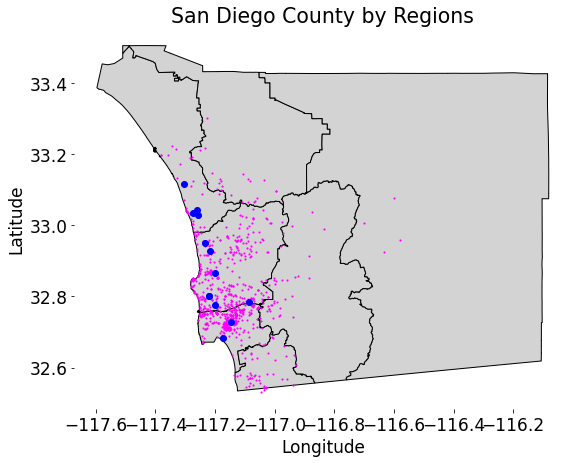

In [15]:
base = df_sdBoundary.plot(color='lightgrey',edgecolor='black')
base.plot(df_parks['longitude'],df_parks['latitude'], 'o', color = "magenta", ms=1.1)
base.plot(df_pickleball['longitude'],df_pickleball['latitude'],'o', color = "blue", ms=6)
base.set(title='San Diego County by Regions',xlabel='Longitude', ylabel='Latitude', frame_on=False);

# Data Analysis & Results

First, I want to gain a general understading of Yelp parks ratings in San Diego County.

count    812.000000
mean       4.035714
std        0.798785
min        1.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64


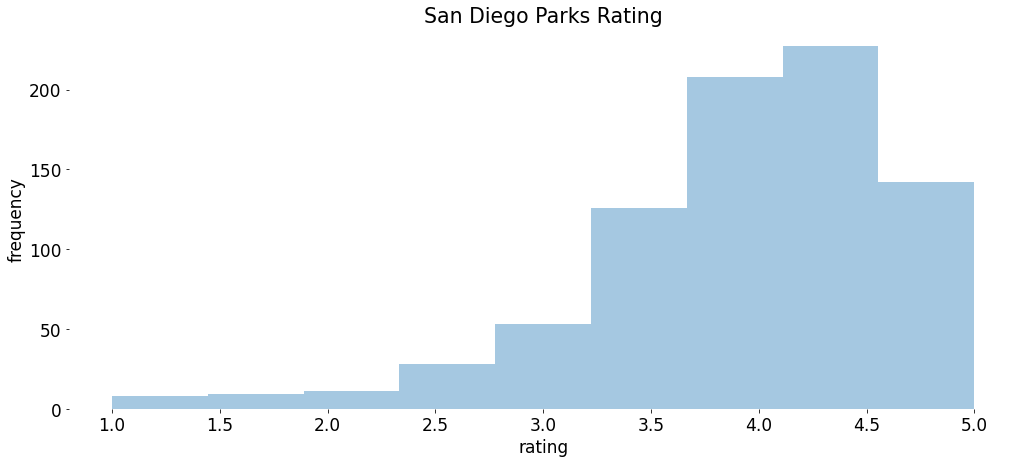

In [16]:
# distributionn of ratings from yelp on San Diego parks
print(df_parks['rating'].describe())
ax = sns.distplot(df_parks['rating'], kde=False, bins=9)
ax.set(title='San Diego Parks Rating', ylabel='frequency',frame_on=False);

Yelp ratings are out of a possible 5 points. A majority of the ratings for SD parks are between a rating of 3.5 and 5.

Similarly, I want to gain a general understading of Yelp pickeball courts ratings in San Diego County by looking at the distribution.

count    13.0
mean      4.5
std       0.5
min       3.5
25%       4.0
50%       4.5
75%       5.0
max       5.0
Name: rating, dtype: float64


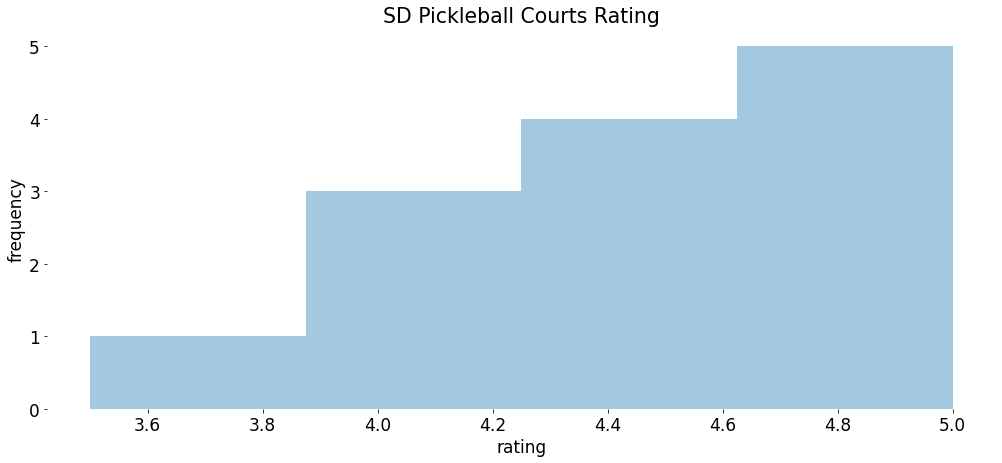

In [17]:
print(df_pickleball['rating'].describe())
ax = sns.distplot(df_pickleball['rating'], kde=False,bins=4)
ax.set(title='SD Pickleball Courts Rating', ylabel='frequency', frame_on=False);

The majority of the pickleball courts ratings are also between a rating of 3.5 and 5, with a minimum rating of 3.5. This suggests that the current pickleball courts are currently enjoyed.

After looking at yelp reviews, I will begin the process for analyzing the relationship relationship between reviewed SD parks proximity to the ocean and Yelp rating. The red markers represent the coast.

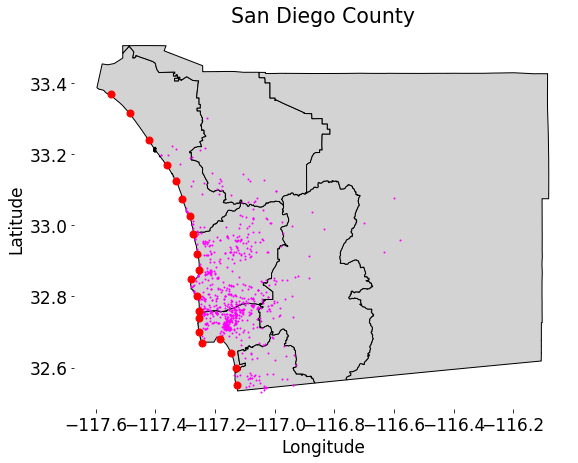

In [18]:
#plot with points along the coast and San Diego parks
base = df_sdBoundary.plot(color='lightgrey',edgecolor='black')
base.plot(df_parks['longitude'],df_parks['latitude'], 'o', color = "magenta", ms=1)
base.plot(df_coast['Ocean_X'],df_coast['Ocean_Y'], 'o', color = "red", ms=7)
base.set(title='San Diego County',xlabel='Longitude', ylabel='Latitude', frame_on=False);

The 20 points along the coast will be used as a way to roughly represent the coast. To find the minimum distance from a park to the coast, we will need to define a function.

In [19]:
# define function to find the shortest distance from inputted coordinates to the coast
def distanceOcean(longitude, latitude):
    x = longitude
    y = latitude
    minDist = ((df_coast.iloc[0,0] - x)**2.0 + (df_coast.iloc[0,1]-y)**2.0) ** 0.5
    for cX, cY in df_coast['coordinates']:
        tempDist = ((cX-x)**2.0 + (cY-y)**2.0) ** 0.5
        if tempDist < minDist:
            minDist = tempDist   
    return minDist

Then, we will create a new column in the SD parks dataset by applying the function to the column coordinates

In [20]:
# apply function to our reviewed parks from df_parks
df_parks['distanceOcean'] = df_parks.apply(lambda x: distanceOcean(x['longitude'], x['latitude']), axis=1)

Preview the new column in df_parks.

In [21]:
df_parks.head()

,name,id,rating,review_count,longitude,latitude,distanceOcean
0,Balboa Park,9M_FW_-Ipx93I36w-_ykBg,5.0,2105,-117.153150,32.734502,0.063126
1,Civita Park,3AEHjqNrTmggA6G9VdhQfg,4.5,46,-117.147278,32.778315,0.105303
2,Waterfront Park,3unbJeYrn1RmInZGmjp80g,4.5,242,-117.172479,32.721952,0.043781
3,Trolley Barn Park,PvHxIYrmaiFKdWUDTMDzcg,4.5,102,-117.143789,32.762463,0.092188
4,Bay View Park,6IF4VB9-fkv_F-LBvG8ppQ,5.0,42,-117.178967,32.701785,0.022605


Now, we want to  gain a general understading of distribution for SD parks distance to the ocean.


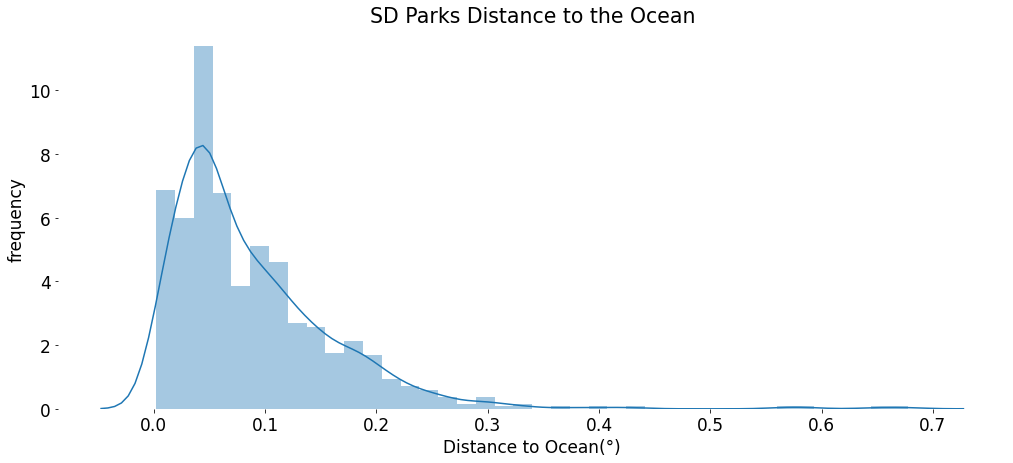

In [22]:
# plot of reviewed parks distance to the coast
ax = sns.distplot(df_parks['distanceOcean'])
ax.set(title='SD Parks Distance to the Ocean',xlabel='Distance to Ocean(°)',ylabel='frequency',frame_on=False);

The distribution looks skewed strong to the right. A log transformation seems appropriate.

In [23]:
df_parks['distanceOcean10'] = np.log10(df_parks['distanceOcean'])

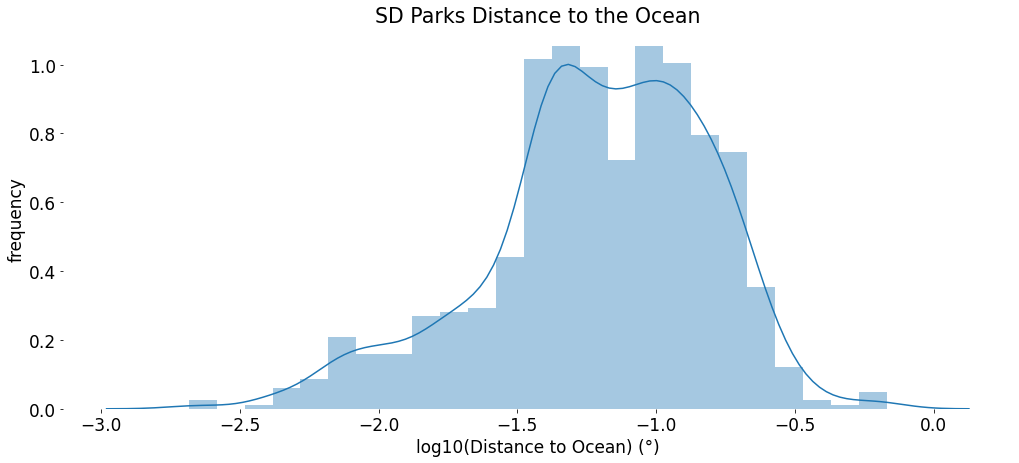

In [24]:
ax = sns.distplot(df_parks['distanceOcean10'])
ax.set(title='SD Parks Distance to the Ocean',xlabel='log10(Distance to Ocean) (°)',ylabel='frequency',frame_on=False);


This plot looks more normal, but that is not enough to say there is a relationship between log10(distance to ocean) and ratings of SD parks.

In [25]:
# correlation matrix 
df_parks.corr()

,rating,review_count,longitude,latitude,distanceOcean,distanceOcean10
rating,1.000000,0.015519,-0.098741,0.065080,-0.049558,-0.116161
review_count,0.015519,1.000000,-0.064365,-0.070992,-0.077254,-0.088497
longitude,-0.098741,-0.064365,1.000000,-0.183548,0.863203,0.787777
latitude,0.065080,-0.070992,-0.183548,1.000000,0.286747,0.143888
distanceOcean,-0.049558,-0.077254,0.863203,0.286747,1.000000,0.836093
distanceOcean10,-0.116161,-0.088497,0.787777,0.143888,0.836093,1.000000


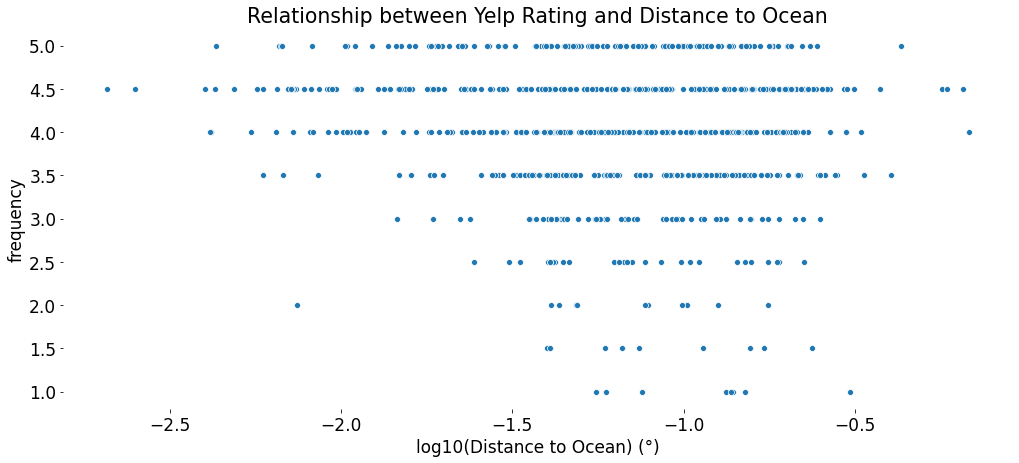

In [26]:
ax = sns.scatterplot(x='distanceOcean10', y='rating', data=df_parks)
ax.set(title='Relationship between Yelp Rating and Distance to Ocean',
       xlabel='log10(Distance to Ocean) (°)',ylabel='frequency',frame_on=False);

The low correlation of -.1161 and messy visual above show that there is almost no relationship between SD parks log10 distance to the ocean and their Yelp rating. Linear regression with the transformed data to prove SD parks log10 distance to the ocean and their Yelp rating are not related will not be necessary.


Now, we will shift our attention to finding places for new or updated pickleball courts. Earlier we saw that the all of the ratings for existing pickleball courts all had Yelp ratings of 3.5 or higher, suggesting satisfaction with current pickleball courts. Therefore, we will adjust our focus to only looking for places to add courts.

To find possible places to add pickleball courts, we will refine our San Diego parks dataframe to only include parks with Yelp ratings of 3.5 and above since these are already popular parks.

In [27]:
df_parks = df_parks[df_parks['rating'] >= 3.5]

We will now look at our final visual to discover possible locations for future pickleball courts. Current pickleball courts are the blue markers and San Diego parks are the smaller pink markers.

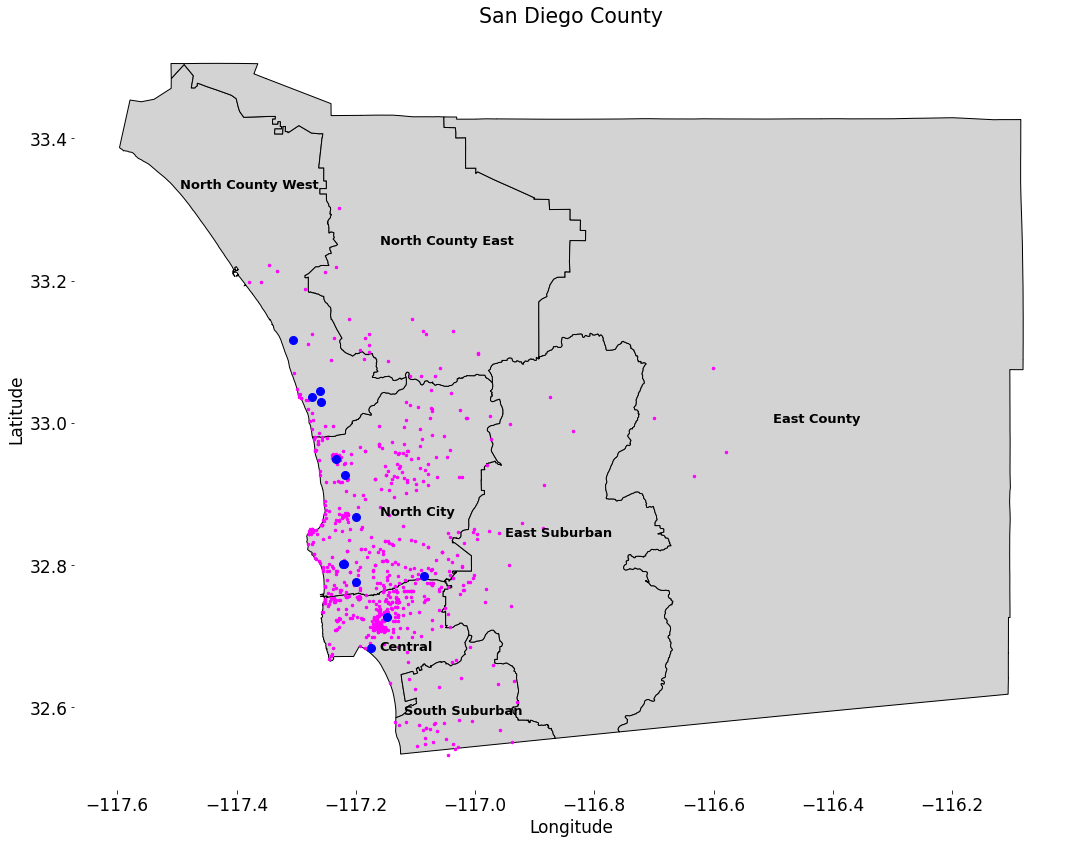

In [29]:
#final plot, blue pickleball, pink SD parks
base = df_sdBoundary.plot(color='lightgrey', edgecolor='black' ,figsize=(30,14))
base.plot(df_parks['longitude'],df_parks['latitude'], 'o', color = "magenta", ms=2.5)
base.plot(df_pickleball['longitude'],df_pickleball['latitude'],'o', color = "blue", ms=8)
base.set(title='San Diego County',xlabel='Longitude', ylabel='Latitude', frame_on=False,);
style = dict(size=13,horizontalalignment='left',color='black', weight='semibold')
base.text(-116.5,33.0, "East County", **style)
base.text(-117.16,33.25, "North County East", **style)
base.text(-117.495,33.33, "North County West", **style)
base.text(-117.16,32.87, "North City", **style)
base.text(-117.16,32.68, "Central", **style)
base.text(-116.95,32.84, "East Suburban", **style)
base.text(-117.12,32.59, "South Suburban", **style);

# Ethics & Privacy

This project did not require using any personal information that would harm anyone, which helps to keep it ethical & private. The data used for San Diego parks does not contain any sensitive information, since I only conducted analysis using longitude and latitude coordinates. 

There may be potential biases among the different parks that we look at due to locational differences among cities and the demographics that compose each city. There also may be biases in the data since there were only 13 pickleball courts reviewed on Yelp in San Diego. I do not think this is entirely accurate of the number of courts played on. I think there may be some bias coming from the people that leave reviews on Yelp since these people are likely to have really enjoyed or hated the court enough to go out of their way to write a review. Lastly, there also may be potential biases from my analysis using dataset constructed to represent the coast. I picked points that were closest to the coast that may not have been uniformly spread out, causing bias to occur in the calculations for distance to the ocean.

# Conclusion & Discussion

After representing the coastline with 20 points, I found the minimum distance between a park and the coast to see if there was a relationship between San Diego park's Yelp rating and their distance to the ocean. After looking at the correlation matrix and distribution, I came to the conclusion that there is no relationship between distance to ocean and rating. 

To answer my second question, I first noticed that the existing pickleball courts that had been reviewed on Yelp all had a rating of 3.5 or higher, which conveyed that there was no need to update any existing parks. I then narrowed my focus on parks in San Diego with a rating of 3.5 or higher as potential future pickleball courts. Looking at the plot, it appeared that suitable locations for future picklball courts would be located in North City and Central region. There also appeared to be no existing pickleball courts in South Subarban so that might be another possibility.

A few limitations that I ran into while conducting my analysis was that I couldn't refine my parks dataset to only include parks that had enough space to even construct a pickleball court. I had to carry out my analysis by rating only which is not the only variable that goes into deciding whether to construct a pickleball court. Also, I had a hard time finding the conversion for latitude and longitude to miles since conversion is not linear. Instead, used distance in degress on latitude and longitude, which still works since it is consistent across calculations.
